## **Disney +**

### 1. Exploración y Preparación de los Datos

Datos descargados de Kaggle

(Mismo código en todos los notebooks de datos)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
data_disney = pd.read_csv('../src:data/Data_Disney+/datos_disney.csv')

print("Filas, columnas:", data_disney.shape)
data_disney.head()

Filas, columnas: (1535, 15)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],NaN,tt0034492,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",NaN,tt0043067,6.9,8229.0,10.698,6.5


In [3]:
# Tipo de dato
data_disney.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [4]:
# Missings

data_disney.isna().sum()

id                         0
title                      0
type                       0
description                6
release_year               0
age_certification        325
runtime                    0
genres                     0
production_countries       0
seasons                 1120
imdb_id                  402
imdb_score               427
imdb_votes               430
tmdb_popularity           11
tmdb_score               109
dtype: int64

In [5]:
#Nulls en porcentaje
for i in data_disney.isna().sum():
    print((i/data_disney.shape[0])*100)

#Destacamos que el 73% de los valores de la columna season son nulos, pero como representan el numero de temporadas, no nos importa mucho, y podría tener sentido

0.0
0.0
0.0
0.39087947882736157
0.0
21.172638436482085
0.0
0.0
0.0
72.9641693811075
26.188925081433222
27.81758957654723
28.013029315960914
0.7166123778501629
7.100977198697069


<AxesSubplot:>

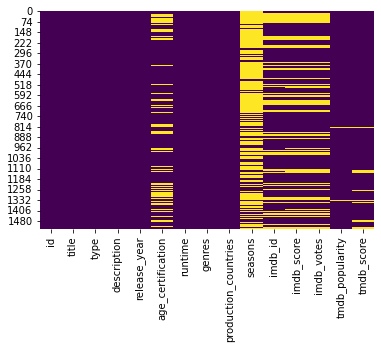

In [6]:
sns.heatmap(data_disney.isnull(),cbar=False,cmap='viridis')

1.2. Columnas

- ID: ID del título en JustWatch

- title: nombre del título

- show type: SHOW o MOVIE - diferenciación entre pelicula o serie

- description: breve descripción

- release year: año de estreno

- age certification: orientacion a padres de edad mínima recomendada

- runtime: duración

- genres: lista de géneros

- production countries: lista de países que produjeron el título

- seasons: número de temporadas

- IMDB ID: ID del título en IMDB

- IMDB Score: puntuación en IMDB

- IMDB Votes: votos en IMDB

- TMDB Score: puntuación en TMDB

- TMDB Popularity: popularidad en TMDB

    La métrica de popularidad de TMDB se mide -diariamente- en función de los parámetros:
    - N de votos al día
    - N vistas de pág al día    
    - N usuarios que marcan el título como favorito    
    - Fecha de estreno +  fecha de emisión del último/nuevo episodio    
    - N total de votos
    - Puntuación de los días anteriores

In [7]:
print(data_disney.columns)
print("N columnas:", len(data_disney.columns))

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
N columnas: 15


In [8]:
# Título
# Cada título representa un contenido 'único' de la plataforma
# Comprobamos que no haya duplicados (ya sabemos que no hay nulos)

print('Tipo de dato:', data_disney['title'].dtype)
titulos_duplicados = data_disney.loc[data_disney.duplicated(['title'])]
print("n titulos duplicados:", titulos_duplicados.shape[0])
titulos_unicos = data_disney['title'].nunique()
print("valores repetidos:", data_disney.shape[0] - titulos_unicos)

#! Disney --> destaca que solo tenga 35 duplicados ??

Tipo de dato: object
n titulos duplicados: 35
valores repetidos: 35


In [9]:
# Tenemos 35 titulos duplicados, pero esto no indica que sean la misma película/serie
# Comprobamos duplicados que coincidan en título, tipo de contenido, año de estreno y duración:

print("n duplicados:", data_disney[data_disney.duplicated(subset=['title', 'type', 'release_year', 'runtime'])].shape[0])
data_disney[data_disney.duplicated(subset=['title', 'type', 'release_year', 'runtime'])]

# Ningún duplicado en este dataset

n duplicados: 0


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [10]:
# Eliminamos las columnas con el id de Imdb ya que no hemos sacado informacion de estas webs - más allá de la ya dada en el dataset
# Tampoco vamos a utilizar en este análisis la descripción de las películas
# Mantenemos tanto la valoración de imdb como de tndm porque al pertenecer imdb a amazon podría haber datos sesgados

data_disney1 = data_disney.drop(['imdb_id', 'description'], axis=1).copy()
print("N columnas:", data_disney1.shape[1])
data_disney1.head()

N columnas: 13


,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,1942,G,70,"['animation', 'drama', 'family']",['US'],NaN,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,1950,PG,96,"['family', 'action']","['GB', 'US']",NaN,6.9,8229.0,10.698,6.5


In [11]:
data_disney1.columns

Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [12]:
# Comprobamos que la columna id tiene valores únicos para cada título 
# --> por si lo necesitásemos a la hora de juntar las tablas de todas las plataformas y diferenciar por contenido exclusivo 
# (por eso no eliminamos esta columna)
print("Valores unicos:", data_disney1['id'].nunique())
print("n filas:", data_disney1['id'].shape[0])

Valores unicos: 1535
n filas: 1535


In [13]:
# Comprobamos los valores de la vble type y nos aseguramos que es de tipo string
# --> La utilizaremos para diferenciar los títulos
data_disney1['type'] = data_disney1['type'].astype(str)
data_disney1['type'].unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [14]:
#Creamos la columna década (tiene más sentido para clasificar el contenido)

decadas = (10 * (data_disney1['release_year'] // 10)).astype(str) + 's'
data_disney1.insert(4, 'Decada', decadas)

#Eliminamos la columna release_year
del data_disney1['release_year']

In [15]:
data_disney1.head()

,id,title,type,Decada,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,1940s,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,1930s,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,1940s,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,1940s,G,70,"['animation', 'drama', 'family']",['US'],NaN,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,1950s,PG,96,"['family', 'action']","['GB', 'US']",NaN,6.9,8229.0,10.698,6.5


In [16]:
df_decadas_disney = pd.DataFrame(data_disney1['Decada'].value_counts())
total = df_decadas_disney['Decada'].sum()
df_decadas_disney['total'] = [round((i/total)*100, 2) for i in df_decadas_disney['Decada']]
df_decadas_disney

,Decada,total
2010s,559,36.42
2020s,297,19.35
2000s,284,18.50
1990s,142,9.25
1980s,54,3.52
1950s,53,3.45
1940s,42,2.74
1970s,39,2.54
1930s,35,2.28
1960s,29,1.89


In [17]:
# age_certificacion --> 21% valores nulos
print("Valores NaN:", len(data_disney1[data_disney1['age_certification'].isna() == True]))
print("Valores:", len(data_disney1[data_disney1['age_certification'].isna() != True]))
#vemos variables para redefinirlas
print("Valores Columna Edad:", data_disney1['age_certification'].unique())

Valores NaN: 325
Valores: 1210
Valores Columna Edad: ['G' 'PG' nan 'TV-G' 'TV-PG' 'TV-14' 'PG-13' 'TV-Y7' 'TV-Y' 'TV-MA']


In [18]:
# Redefinimos los valores

"""
- G:        > 0 - Todas las edades
- TV-G:     > 0 - 
- TV-Y:     < 6 años 
- TV-Y7:    < 7 años 
- TV-PG:    < Puede ser inadecuado para niños sin la guía de un padre  (lo definimos como para mayores de 13) 
- PG:       < Puede ser inadecuado para niños sin la guía de un padre  (lo definimos como para mayores de 13) 
- PG-13:    > 13
- TV-14:    > 14 
- R:        > 17 - Restringido
- NC-17:    > 17 - No se admiten menores de 17
- TV-MA     > 17 

- Límites:
    0 (años) = todos los públicos
    7 (años) = + 7 años
    13 (años) = + 13 años
    17 (años) = + 17 años

Tenemos 2609 valores numeros --> le asignamos el numero 9999 (no podemos eliminarlos)
"""

data_disney1['age_certification'] = np.where(data_disney1['age_certification'] == "G", 0, data_disney1['age_certification'])
data_disney1['age_certification'] = np.where(data_disney1['age_certification'] == "TV-G", 0, data_disney1['age_certification'])
data_disney1['age_certification'] = np.where(data_disney1['age_certification'] == "TV-Y", 7, data_disney1['age_certification'])
data_disney1['age_certification'] = np.where(data_disney1['age_certification'] == "TV-Y7", 7, data_disney1['age_certification'])
data_disney1['age_certification'] = np.where(data_disney1['age_certification'] == "TV-PG", 7, data_disney1['age_certification'])
data_disney1['age_certification'] = np.where(data_disney1['age_certification'] == "PG", 7, data_disney1['age_certification'])
data_disney1['age_certification'] = np.where(data_disney1['age_certification'] == "PG-13", 13, data_disney1['age_certification'])
data_disney1['age_certification'] = np.where(data_disney1['age_certification'] == "TV-14", 13, data_disney1['age_certification'])
data_disney1['age_certification'] = np.where(data_disney1['age_certification'] == "NC-17", 17, data_disney1['age_certification'])
data_disney1['age_certification'] = np.where(data_disney1['age_certification'] == "TV-MA", 17, data_disney1['age_certification'])

# Asignamos el numero 9999 a los valores nulos:
data_disney1['age_certification'] = data_disney1['age_certification'].fillna(9999)

# Comprobamos cambios
data_disney1['age_certification'] = data_disney1['age_certification'].astype(int)
print("Valores Columna Edad:", data_disney1['age_certification'].unique())
print("Valores NaN:", len(data_disney1[data_disney1['age_certification'].isna() == True]))

Valores Columna Edad: [   0    7 9999   13   17]
Valores NaN: 0


In [19]:
df_edades_disney = pd.DataFrame(data_disney1['age_certification'].value_counts())
total = data_disney1['age_certification'].value_counts().sum()
df_edades_disney['total'] = [round((i/total)*100, 2) for i in df_edades_disney['age_certification']]
df_edades_disney

,age_certification,total
7,555,36.16
0,501,32.64
9999,325,21.17
13,148,9.64
17,6,0.39


In [20]:
#Comprobamos numero de listas vacías en columna genres

nan_genres = 0
for i in data_disney1['genres']:
    if "[]" in i:
        nan_genres +=1
print("N NaN en 'genres':", nan_genres)
print("% NaN en 'genres':", round(nan_genres / data_disney1.shape[0] *100, 2))

N NaN en 'genres': 28
% NaN en 'genres': 1.82


In [21]:
# Sacamos todos los generos que incluye la columna para agruparlos

otra_lista = []
for lista in data_disney1['genres'].apply(eval):
    for x in lista:
        otra_lista.append(x)

In [22]:
# Pasamos a serie para ver valores únicos
generos = pd.Series(otra_lista)
print("generos:", generos.unique())
print("n generos:", len(generos.unique()))

generos: ['animation' 'family' 'music' 'fantasy' 'romance' 'thriller' 'drama'
 'comedy' 'action' 'horror' 'documentation' 'scifi' 'western' 'sport'
 'european' 'crime' 'history' 'reality' 'war']
n generos: 19


In [23]:
print(data_disney1['genres'].dtype) # --> object
print(data_disney1['genres'].iloc[0])
type(data_disney1['genres'].iloc[0]) #-->str
print(data_disney1['genres'].iloc[0][0]) #--> interpreta el primer elemento de la lista como el primer caracter

#Aunque tiene un formato visualmente de lista --> es un string

object
['animation', 'family', 'music', 'fantasy']
[


In [24]:
# Eliminamos caracteres y separamos por la coma para poder acceder a cada genero de la lista

data_disney1['genres'] = data_disney1['genres'].str.replace("[", "").str.replace("]","").str.replace("'", "").str.replace('"',"")
data_disney1['genres'] = data_disney1['genres'].str.rsplit(pat=", ")
data_disney1['genres'][0][0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



'animation'

In [25]:
# Bajo la suposicion de que el genero principal de cada titulo es el primero que aparece, definimos la columna['genres'] por el primer genero que aparezca en su lista

data_disney1['genres'] = [fila[0] for fila in data_disney1['genres']]

In [26]:
df_generos_disney = pd.DataFrame(data_disney1['genres'].value_counts())
total = df_generos_disney['genres'].sum()
print("N generos:", total)
df_generos_disney['total'] = [round((i/total)*100, 2) for i in df_generos_disney['genres']]
df_generos_disney

N generos: 1535


,genres,total
documentation,301,19.61
comedy,299,19.48
animation,236,15.37
fantasy,154,10.03
scifi,129,8.40
drama,105,6.84
action,92,5.99
family,63,4.10
romance,37,2.41
reality,29,1.89


In [27]:
df_generos_disney['genres'].astype(str)

documentation    301
comedy           299
animation        236
fantasy          154
scifi            129
drama            105
action            92
family            63
romance           37
reality           29
                  28
music             17
thriller          13
western           12
history           10
horror             5
crime              4
war                1
Name: genres, dtype: object

In [28]:
len(df_generos_disney['genres'][df_generos_disney['genres'] == ""])

0

In [29]:
#Comprobamos numero de listas vacías en columna production countries

nan_countries = 0
for i in data_disney1['production_countries']:
    if "[]" in i:
        nan_countries +=1
print("N NaN en 'production_countries':", nan_countries)
print("% NaN en 'production_countries':", round(nan_countries / data_disney1.shape[0] *100, 2))

N NaN en 'production_countries': 47
% NaN en 'production_countries': 3.06


In [30]:
# Sacamos todos los países que incluye la columna para agruparlos

otra_lista_paises = []
for lista in data_disney1['production_countries'].apply(eval):
    for x in lista:
        otra_lista_paises.append(x)

In [31]:
# Pasamos a serie para ver valores únicos
paises = pd.Series(otra_lista_paises)
print("paises:", paises.unique())
print("n paises:", len(paises.unique()))

paises: ['US' 'GB' 'CA' 'FR' 'SE' 'NO' 'JP' 'AT' 'AU' 'SK' 'SUHH' 'NZ' 'DE' 'PL'
 'SI' 'CZ' 'SG' 'HU' 'IE' 'ES' 'CH' 'MC' 'IN' 'XX' 'HK' 'CN' 'BR' 'AR'
 'CI' 'UG' 'NL' 'PT' 'MX' 'KR' 'BE' 'IT' 'CL' 'GR' 'ZA' 'DK' 'PH' 'KI'
 'BW']
n paises: 43


In [32]:
data_disney1['production_countries'][0]

"['US']"

In [33]:
#Eliminamos corchetes y comillas
data_disney1['production_countries'] = data_disney1['production_countries'].str.replace("[", "").str.replace("]","").str.replace("'","").str.replace('"',"")
data_disney1['production_countries'][0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



'US'

In [34]:
df_paises_disney = pd.DataFrame(data_disney1['production_countries'].value_counts())
total_paises = df_paises_disney['production_countries'].sum()
print("N paises produccion:", total_paises)
df_paises_disney['total'] = [round((i/total_paises)*100, 2) for i in df_paises_disney['production_countries']]
df_paises_disney

N paises produccion: 1535


,production_countries,total
US,1278,83.26
,47,3.06
GB,27,1.76
"CA, US",24,1.56
"GB, US",19,1.24
...,...,...
"FR, PT",1,0.07
"US, AU, GB",1,0.07
"US, SK",1,0.07
"BE, GB, US",1,0.07


In [35]:
n_varios_paises = 0

for fila in data_disney1['production_countries']:
    if len(fila) > 2:
        n_varios_paises += 1
        
print("Peliculas con varios paises:", n_varios_paises)
perc_varios_paises = round(n_varios_paises/total_paises *100, 2)
print("Porcentaje:", perc_varios_paises)

Peliculas con varios paises: 133
Porcentaje: 8.66


In [36]:
# Como, en algunos casos, hay más de un pais por titulo, 
# hacemos como con la columna genero, presuponemos que el principal es el primero de la fila
data_disney1['production_countries'] = [i[:2] for i in data_disney1['production_countries'] if int(len(data_disney1['production_countries']) > 2)]

In [37]:
df_paises_un_disney = pd.DataFrame(data_disney1['production_countries'].value_counts())
total_un_paises = df_paises_un_disney['production_countries'].sum()
print("N paises produccion:", total_un_paises)
df_paises_un_disney['total'] = [round((i/total_paises)*100, 2) for i in df_paises_un_disney['production_countries']]
df_paises_un_disney

N paises produccion: 1535


,production_countries,total
US,1321,86.06
GB,49,3.19
,47,3.06
CA,34,2.21
FR,18,1.17
AU,12,0.78
DE,8,0.52
JP,5,0.33
NZ,5,0.33
IN,4,0.26


In [38]:
# Sacamos el los paises y el n paises final
print(data_disney1['production_countries'].unique())
print(data_disney1['production_countries'].nunique())

['US' 'GB' 'CA' '' 'FR' 'SE' 'JP' 'AU' 'SU' 'NZ' 'DE' 'PL' 'SG' 'ES' 'IN'
 'XX' 'HK' 'CN' 'AR' 'CI' 'NL' 'MX' 'BE' 'IT' 'CL' 'GR' 'DK' 'PH' 'BR'
 'BW' 'ZA' 'KR']
32


In [39]:
# Los nulos de la columna season significa que son 1 película o que tienen solo 1 temporada, por lo que los cambiamos a 1
# A tener en cuenta en el análisis --> no sabemos si la columna representa las temporadas existestes del título, 
# o sólo las que están disponibles en la plataforma
data_disney1['seasons'] = data_disney1['seasons'].fillna(1)
data_disney1['seasons'] = data_disney1['seasons'].astype(int)
print("Valores NaN:", len(data_disney1[data_disney1['seasons'].isna() == True]))

Valores NaN: 0


In [40]:
# comprobamos cuantos votos nulos, tambien tienen puntuaciones nulas 
print(len(data_disney1[data_disney1['imdb_score'].isna() == True]['imdb_votes']))

427


In [41]:

# columna imdb_score --> 427 nulos: 
# Al definir la opinion de los usuarios sobre cada título, no tiene sentido rellenar con un estadístico -con los datos que tenemos ahora mismo
# Intentamos rellenar con la columna de tmdb

data_disney1['imdb_score'] = data_disney1['imdb_score'].fillna(data_disney1['tmdb_popularity'])
len(data_disney1[data_disney1['imdb_score'].isna() == True])


data_disney1['imdb_score'] = data_disney1['imdb_score'].fillna(0)
data_disney1['imdb_score'] = data_disney1['imdb_score'].astype(float)
len(data_disney1[data_disney1['imdb_score'].isna() == True])


0

Al final no voy a incluir las columnas tmdb popularity, var_votos ni imdb votos en el analisis
--dejo las celdas como comentarios por si cambiase de opinion 

In [42]:

#columna ibdb_votes --> 430 nulos (todos los NaN de imdb_score, son también NaN en esta variable)
# Como se trata del número de votos de una película -medida de cantidad-, rellenamos con la media de votos

print('Rellenamos null con la media de votos:', data_disney1['imdb_votes'].mean())
data_disney1['imdb_votes'] = data_disney1['imdb_votes'].fillna(data_disney1['imdb_votes'].mean())
data_disney1['imdb_votes'] = data_disney1['imdb_votes'].astype(int)

Rellenamos null con la media de votos: 76350.04162895928


In [43]:

# Creamos columna con la variacion, respecto a la media, del numero de votos:
var_votos = [round(i / data_disney1['imdb_votes'].mean(), 2) for i in data_disney1['imdb_votes']]
data_disney1.insert(11, 'Var_Votos', var_votos)


In [44]:
# columna tmdb_score --> 109 nulos: 
# Al definir la opinion de los usuarios sobre cada título, no tiene sentido rellenar con un estadístico
# No le asignamos la puntuación de imdb porque el objetivo de mantener la columna de tmdb es, en caso de sesgo, poder comprobar puntuacion de tmdb

data_disney1['tmdb_score'] = data_disney1['tmdb_score'].fillna(0)
data_disney1['tmdb_score'] = data_disney1['tmdb_score'].astype(float)


In [45]:

# columna tmdb_popularity --> 11 nulos: 
# La popularidad es una métrica (DIARIA) creada en función del comportamiento de los usuarios con cada título
# No se considera rellenar por estadístico, ya que se trata de una métrica que engloba diferentes vbles -y muchas de ellas representan opiniones subjetivas 

data_disney1['tmdb_popularity'] = data_disney1['tmdb_popularity'].fillna(0)
data_disney1['tmdb_popularity'] = data_disney1['tmdb_popularity'].astype(float)


In [46]:
data_disney2 = data_disney1.drop(['imdb_votes', 'Var_Votos', 'tmdb_popularity'], axis=1).copy()

In [47]:
data_disney2.columns

Index(['id', 'title', 'type', 'Decada', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_score',
       'tmdb_score'],
      dtype='object')

In [48]:
# renombramos las columnas

data_disney2.columns = ['ID', 'Titulo', 'Tipo', 'Decada', 'Edad_Recom', 'Duracion', 'Generos', 'Paises_Prod', 'Temporadas', 'Imdb_Puntos', 'Tmdb_Puntos']

In [49]:
# recordamos tipo de cada columna y nos aseguramos que ya no hay nulos
print("Filas, columnas:", data_disney2.shape)
data_disney2.info()

Filas, columnas: (1535, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1535 non-null   object 
 1   Titulo       1535 non-null   object 
 2   Tipo         1535 non-null   object 
 3   Decada       1535 non-null   object 
 4   Edad_Recom   1535 non-null   int64  
 5   Duracion     1535 non-null   int64  
 6   Generos      1535 non-null   object 
 7   Paises_Prod  1535 non-null   object 
 8   Temporadas   1535 non-null   int64  
 9   Imdb_Puntos  1535 non-null   float64
 10  Tmdb_Puntos  1535 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 132.0+ KB


In [50]:
#No había ningun duplicado en los titulos, por lo que nos quedamos con los 1535 titulos iniciales

n_titulos_sacados = data_disney.shape[0] - data_disney2.shape[0]
print(n_titulos_sacados)
perc_n_titulos_sacados = n_titulos_sacados / data_disney.shape[0]
print(round(perc_n_titulos_sacados*100, 2))

0
0.0


In [51]:
#Separamos el dataframe en dos:
# Por un lado analizaremos el contenido de series y por otro el de películas

disney_series_df = data_disney2[data_disney2['Tipo']=='SHOW']
disney_series_df = disney_series_df.reset_index(drop = True)
print("n_filas_series:", disney_series_df.shape[0])

# Eliminamos la columna de tipo porque ya no nos interesa
del disney_series_df['Tipo']

n_filas_series: 415


In [52]:
disney_series_df.head()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Temporadas,Imdb_Puntos,Tmdb_Puntos
0,ts22470,The Muppet Show,1970s,0,25,comedy,GB,5,8.4,8.1
1,ts30718,Schoolhouse Rock!,1970s,9999,3,animation,US,7,8.2,7.8
2,ts28051,The Mickey Mouse Club,1950s,7,31,family,US,3,7.6,5.8
3,ts24939,Spider-Woman,1970s,7,21,animation,US,1,5.8,8.0
4,ts27944,Spin and Marty,1950s,9999,12,western,US,1,8.0,8.0


In [53]:
disney_series_df.tail()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Temporadas,Imdb_Puntos,Tmdb_Puntos
410,ts273161,Foodtastic,2020s,7,42,reality,US,1,4.80,1.0
411,ts272675,Breaking Bobby Bones,2020s,13,22,documentation,US,1,1.40,0.0
412,ts271728,The Wild Life of Dr. Ole,2020s,7,44,documentation,US,1,8.40,0.0
413,ts288962,Turning the Tables with Robin Roberts,2020s,9999,27,,US,1,5.70,0.0
414,ts313961,Vets on the Beach,2020s,7,44,documentation,,1,1.96,0.0


In [54]:
disney_peliculas_df = data_disney2[data_disney2['Tipo']=='MOVIE']
disney_peliculas_df = disney_peliculas_df.reset_index(drop = True)
print("n_filas_peliculas:", disney_peliculas_df.shape[0])
disney_peliculas_df.head()

# Eliminamos la columna de tipo porque ya no nos interesa
# Al ser peliculas, tambien eliminamos la columna de temporadas
del disney_peliculas_df['Tipo']
del disney_peliculas_df['Temporadas']

n_filas_peliculas: 1120


In [55]:
disney_peliculas_df.head()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Imdb_Puntos,Tmdb_Puntos
0,tm74391,Fantasia,1940s,0,120,animation,US,7.7,7.4
1,tm67803,Snow White and the Seven Dwarfs,1930s,0,83,fantasy,US,7.6,7.1
2,tm82546,Pinocchio,1940s,0,88,animation,US,7.5,7.1
3,tm79357,Bambi,1940s,0,70,animation,US,7.3,7.0
4,tm62671,Treasure Island,1950s,7,96,family,GB,6.9,6.5


In [56]:
disney_peliculas_df.tail()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Imdb_Puntos,Tmdb_Puntos
1115,tm1071287,Killer Shark vs. Killer Whale,2020s,13,44,documentation,US,6.400,4.0
1116,tm1091101,Far From Raven's Home,2020s,0,11,animation,,5.600,10.0
1117,tm1075680,World's Most Dangerous Shark?,2020s,13,44,documentation,,1.400,0.0
1118,tm1133820,The Magic Maker,2020s,7,43,,US,4.200,0.0
1119,tm1091117,Smoky Mountain Park Rangers,2020s,7,42,documentation,US,1.761,0.0


In [57]:
#Comprobamos
data_disney2.shape[0] == disney_peliculas_df.shape[0] + disney_series_df.shape[0]

True

In [58]:
# GRÁFICO PIE SERIES - PELICULAS

# Si tuviesemos el numero de capitulos por temporada podríamos estimar una comparacion más realista del contenido
# --> (se podría haber sacado con webscrapping)


labels = ['Peliculas', 'Series']
values =  [disney_peliculas_df.shape[0], disney_series_df.shape[0]]

fig = px.pie(values=values, labels=labels, #names= labels,
width = 600, height=450,
title = "<b>Peso Contenido<b>", #hoverinfo=values,
color = labels, 
color_discrete_map={'Peliculas':'black',
                                 'Series':'darkblue'}
)

fig.update_traces(marker=dict(line=dict(color='white', width=2.4)),
                    hovertemplate = labels
)
                 

fig.update_layout(font_family = 'Arial', title_font_family='Arial')

#color=labels, )
fig.show()

#color_discrete_sequence=px.colors.sequential.Greys_r
#hol=0.5

1.3. Fichero Contenidos Disney+

In [59]:
#  Pasamos las tablas a un CSV:

disney_peliculas_df.to_csv('df_disney_peliculas.csv', encoding='utf-8')
disney_series_df.to_csv('df_disney_series.csv', encoding='utf-8')